In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Đọc file csv và gắng index với giá Close
df = pd.read_csv('D:/PTDLKD/ProjectData/dataset/HBAN.csv')
df1 = df.reset_index()['Close']
df1.describe()

count    3375.000000
mean       10.746607
std         3.446404
min         3.680000
25%         7.490000
50%        10.560000
75%        13.855000
max        17.629999
Name: Close, dtype: float64

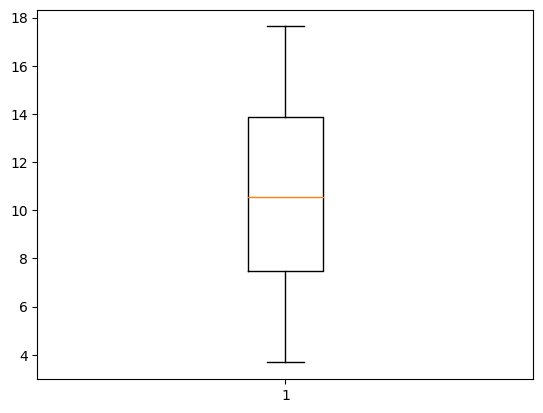

In [3]:
# Tạo plot
plt.boxplot(df1)
plt.show()

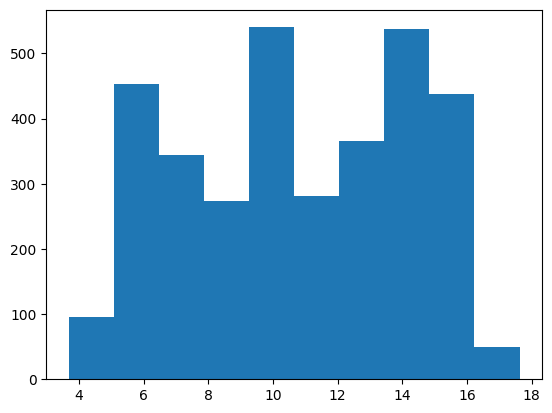

In [4]:
# Tạo Histogram
plt.hist(df1)
plt.show()

In [5]:
# Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))


In [6]:
# Chia train/test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [7]:
# Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 614
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [9]:
# Fit mô hình GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [10]:
# Dự báo dữ liệu
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))
y_test = scaler.inverse_transform(ytest.reshape(-1, 1))
y_val = scaler.inverse_transform(yval.reshape(-1, 1))

In [12]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )
yval = scaler.inverse_transform(yval.reshape(-1,1) )

In [13]:
# 12. Đánh giá độ chính xác thuật toán
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mape = np.mean(np.abs((y_pred_val - yval) / yval)) * 100
test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 0.5961397283831861
Testing RMSE: 0.3477677474952127
Validation MAE: 0.38798383079943516
Testing MAE: 0.2789936368238847
Validation MAPE: 3.5176860288308394
Testing MAPE: 2.987436254496717


In [14]:
# Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=614
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
    
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.61505381 0.60573481 0.62867388 0.62150542 0.62939073 0.61935488
 0.63655919 0.64157711 0.63655919 0.65663087 0.74695346 0.77132622
 0.77060937 0.79211475 0.80430113 0.8021506  0.81146959 0.79426529
 0.80286744 0.78853052 0.77634414 0.72831546 0.70250901 0.70537639
 0.68817209 0.70896062 0.68458786 0.68387102 0.70609324 0.71254485
 0.74838715 0.74480292 0.75555561 0.75985669 0.76272407 0.76200722
 0.77204307 0.81505382 0.80931905 0.79713267 0.83297497 0.85232981
 0.8630825  0.89892472 0.86164881 0.83584235 0.8709678  0.86451619
 0.87813626 0.86738357 0.89964164 0.92688186 0.88745519 0.90824379
 0.90609325 0.93333347 0.91899648 0.89032264 0.89032264 0.90824379
 0.88172049 0.86451619 0.83297497 0.83440866 0.8709678  0.88888895
 0.85519719 0.88387103 0.8630825  0.88172049 0.89103956 0.89032264
 0.89318996 0.88673834 0.90250903 0.91756279 0.89318996 0.90896071
 0.89032264 0.89605741 0.87383519 0.82365597 0.84731189 0.77275991
 0.80430113 0.82580651 0.82580651 0.83297497 0.847

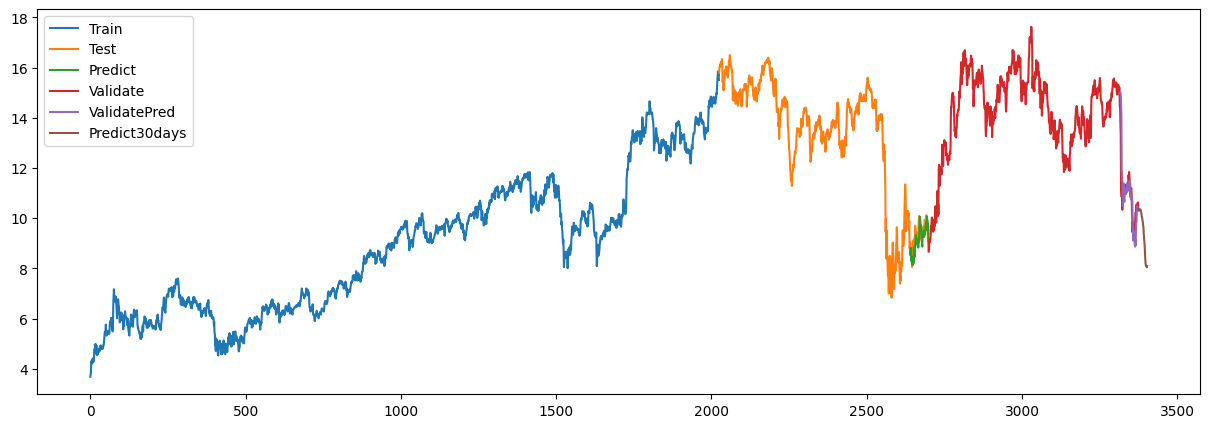

In [15]:
# Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.subplots(figsize=(15, 5))
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+615, stop=train_size+test_size, step=1)
plt.plot(test_data_index[:len(y_pred)], y_pred)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+615, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index[:len(y_pred)],y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index[:len(y_pred)], scaler.inverse_transform(np.reshape(lst_output, (-1, 1))))
plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred', 'Predict30days'])
plt.show()

In [16]:
lst_output_2d = np.array(lst_output).reshape(-1, 1)
scaler.inverse_transform(lst_output_2d)

array([[10.3801027 ],
       [10.36226119],
       [10.32165513],
       [10.33154943],
       [10.30679803],
       [10.34256909],
       [10.35335256],
       [10.35335256],
       [10.32462145],
       [10.29869124],
       [10.22382714],
       [10.14640702],
       [10.05231495],
       [10.00663438],
       [ 9.91752188],
       [ 9.85621751],
       [ 9.73342103],
       [ 9.66082427],
       [ 9.41596806],
       [ 9.24300204],
       [ 9.06762172],
       [ 8.92139631],
       [ 8.62717746],
       [ 8.38653037],
       [ 8.18966058],
       [ 8.10273063],
       [ 8.10097322],
       [ 8.09046799],
       [ 8.03954599],
       [ 8.09117572]])